# Melodic compatibility

## Stats

In [6]:
from collections import Counter

from src.stats_comp import compatibility_corpus, compatibility_ratios_to_stats

all_sets = compatibility_corpus('data/compiled/')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Total compatibility: {total_comp}')
print(all_sets)

found_zero = False
number_of_variables = 0
value_distribution = {
    '0': 0,
    '1/4': 0,
    '1/3:': 0,
    '1/2': 0,
    '2/3': 0,
    '3/4': 0,
    '1': 0,
}

values = []
for element in all_sets:
    for subelement in element:
        for subsubelement in subelement:
            for value in subsubelement:
                number_of_variables += 1
                values.append(value)
                if value == 0.0:
                    found_zero = True
                
if found_zero:
    print("Found zero")
print(f'Number of variables: {number_of_variables}')

count_dict = Counter(values)
print(count_dict)

def round_nested(d, ndigits=3):
    """
    Recursively rounds all floats in a nested dict/list structure.
    """
    if isinstance(d, dict):
        return {k: round_nested(v, ndigits) for k, v in d.items()}
    elif isinstance(d, list):
        return [round_nested(v, ndigits) for v in d]
    elif isinstance(d, float):
        return round(d, ndigits)
    else:
        return d

print(round_nested(all_sets))

Total compatibility: 0.6705685618729097
[[[[0.6923076923076923, 0.7692307692307693, 0.5384615384615384, 0.6153846153846154, 0.5384615384615384, 0.6153846153846154, 0.7692307692307693, 0.8461538461538461, 0.6153846153846154, 0.9230769230769231, 1.0], [0.6153846153846154, 0.6153846153846154, 0.5384615384615384, 0.9230769230769231, 0.6923076923076923, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.6923076923076923, 0.7692307692307693, 0.6153846153846154, 0.5384615384615384, 0.6923076923076923, 0.6153846153846154, 0.8461538461538461, 0.6923076923076923, 0.7692307692307693, 0.5384615384615384, 0.5384615384615384, 0.6153846153846154, 0.5384615384615384, 1.0, 1.0], [0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.6153846153846154, 0.5384615384615384, 0.7692307692307693, 0.7692307692307693, 0.6153846153846154, 0.7692307692307693, 0.5384615384615384, 0.6923076923076923, 0.6923076923076923, 0.5384615384615384, 0.7692307692307693, 0.6923076923076923, 0.538461538461538

Example of computing compatibility score for sets of positions, and showing its just averaging:

In [5]:
from src.stats_comp import compatibility_ratios_to_stats

first_line = [0.6923076923076923, 0.7692307692307693, 0.5384615384615384, 0.6153846153846154, 0.5384615384615384, 0.6153846153846154, 0.7692307692307693, 0.8461538461538461, 0.6153846153846154, 0.9230769230769231, 1.0]

average = sum(first_line) / len(first_line)

print(f'Average of first line: {average}')

print(compatibility_ratios_to_stats(first_line))

assert average == compatibility_ratios_to_stats(first_line)



Average of first line: 0.7202797202797203
0.7202797202797203


## Single heatmap

Let's first make a text matrix of the sylls of the first strophe, to have something as a handy reference overlay on the heatmap.

In [1]:
from src.utils.utils import get_text_matrix

# Print the shape
text_matrix, row_lengths = get_text_matrix("data/compiled/py04_manual.xml", strophe_index=1)
num_rows = len(text_matrix)
row_lengths = [len(row) for row in text_matrix]
print(f"Number of rows: {num_rows}")
print(f"Length of each row: {row_lengths}")

Number of rows: 23
Length of each row: [11, 23, 20, 15, 15, 18, 14, 8, 11, 23, 20, 15, 15, 18, 14, 8, 19, 19, 15, 20, 16, 12, 19]


In [1]:
from src.utils.utils import get_text_matrix

# Print the shape
text_matrix, row_lengths = get_text_matrix("data/compiled/ht_olympians_triads.xml", canticum_index=1)
num_rows = len(text_matrix)
row_lengths = [len(row) for row in text_matrix]
print(f"Number of rows: {num_rows}")
print(f"Length of each row: {row_lengths}")

Number of rows: 30
Length of each row: [15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 19, 14, 13, 17, 13, 12, 10, 18]


Here's a full code for making a heatmap with text overlay:

Number of rows: 23
Length of each row: [11, 23, 20, 15, 15, 18, 14, 8, 11, 23, 20, 15, 15, 18, 14, 8, 19, 19, 15, 20, 16, 12, 19]


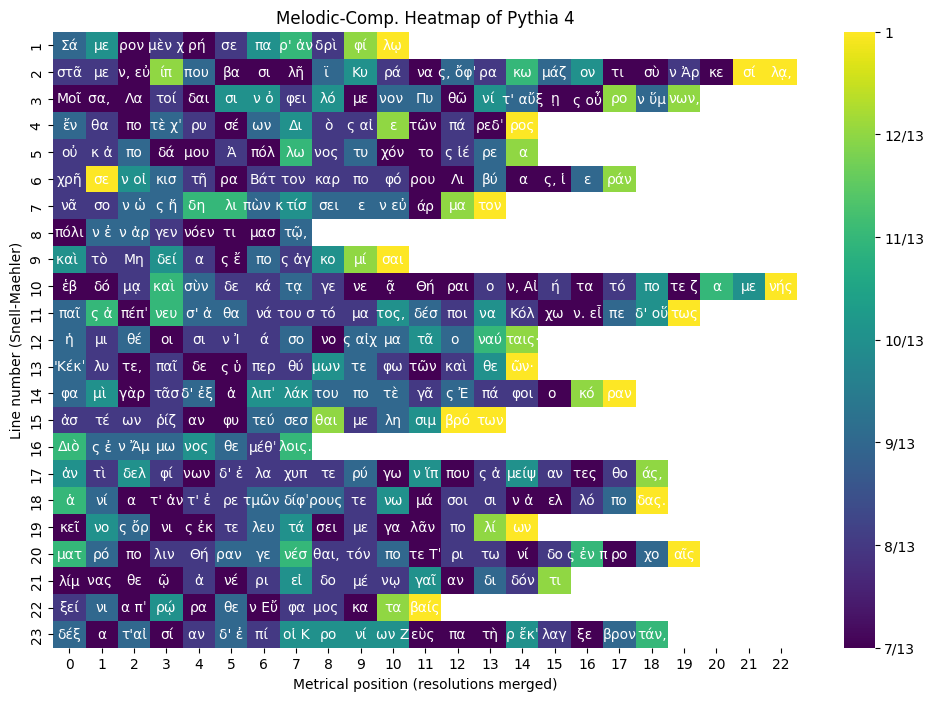

In [5]:
from src.utils.utils import get_text_matrix

# -----------------------------
# Prepare text matrix
# -----------------------------

text_matrix, row_lengths = get_text_matrix("data/compiled/py04_manual.xml", canticum_index=1)
num_rows = len(text_matrix)
row_lengths = [len(row) for row in text_matrix]

print(f"Number of rows: {num_rows}")
print(f"Length of each row: {row_lengths}")

# -----------------------------
# Plot heatmap with text
# -----------------------------

from fractions import Fraction
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.stats_comp import compatibility_play

data = compatibility_play('data/compiled/py04_manual.xml')

# Unwrap nested tensor structure
data_matrix = data[0]

# -----------------------------
# Shape check
# -----------------------------
num_rows_text = len(text_matrix)
num_rows_data = len(data_matrix)

if num_rows_text != num_rows_data:
    raise ValueError(f"Number of rows mismatch: text_matrix={num_rows_text}, data_matrix={num_rows_data}")

max_len_text = max(len(row) for row in text_matrix)
max_len_data = max(len(row) for row in data_matrix)

if max_len_text != max_len_data:
    raise ValueError(f"Row length mismatch: max text length={max_len_text}, max data length={max_len_data}")

# -----------------------------
# Pad numeric matrix for heatmap
# -----------------------------
max_len = max_len_data
padded_data = np.full((len(data_matrix), max_len), np.nan)
for i, row in enumerate(data_matrix):
    padded_data[i, :len(row)] = row


min_val = np.nanmin(padded_data)
min_frac = Fraction(min_val).limit_denominator()  # exact rational

# denominator b
den = min_frac.denominator
start = min_frac.numerator

# Generate fractions from a/b to b/b
fractions = [Fraction(n, den) for n in range(start, den + 1)]
tick_positions = [float(fr) for fr in fractions]
tick_labels = [str(fr) for fr in fractions]

# -----------------------------
# Plot heatmap
# -----------------------------
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    padded_data,
    cmap="viridis",
    mask=np.isnan(padded_data),
    cbar=True,
    cbar_kws={'ticks': tick_positions}
)

# Set fraction labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticklabels(tick_labels)

# Overlay text
for i, row in enumerate(text_matrix):
    for j, val in enumerate(row):
        ax.text(
            j + 0.5, i + 0.5,
            val,
            ha='center', va='center',
            color='white', fontsize=10
        )

plt.xlabel("Metrical position (resolutions merged)")
plt.ylabel("Line number (Snell-Maehler)")
plt.title("Melodic-Comp. Heatmap of Pythia 4")
plt.yticks(
    ticks=np.arange(len(data_matrix)) + 0.5,
    labels=np.arange(1, len(data_matrix) + 1)
)

plt.savefig("media/plots/heatmap_pythia_4_comp.png", dpi=600, bbox_inches="tight")
plt.show()

A striking aesthetic effect can be achieved by removing all text, a good fit for posters:

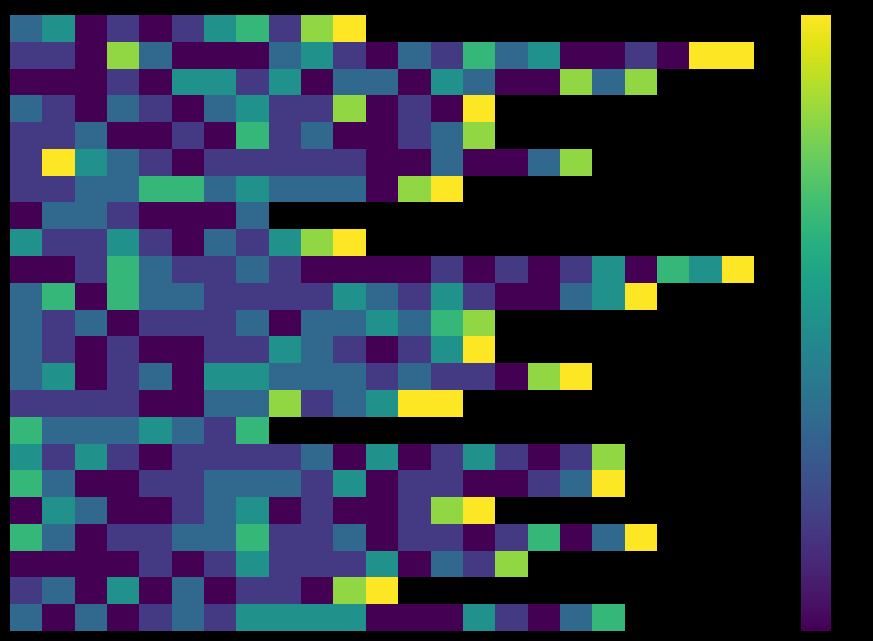

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.stats_comp import compatibility_play

data = compatibility_play('data/compiled/py04.xml')

# Unwrap nested tensor structure (unwrap once for "play" with one song)
data_matrix = data[0]

num_rows_data = len(data_matrix)
max_len_data = max(len(row) for row in data_matrix)

# -----------------------------
# Pad numeric matrix for heatmap
# -----------------------------
max_len = max_len_data
padded_data = np.full((len(data_matrix), max_len), np.nan)
for i, row in enumerate(data_matrix):
    padded_data[i, :len(row)] = row

# -----------------------------
# Plot heatmap (dark mode, no text overlay)
# -----------------------------
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    padded_data, 
    cmap="viridis", 
    mask=np.isnan(padded_data), 
    cbar=True,
    vmax = 1
)

# Dark background + white labels
ax.set_facecolor("black")
ax.figure.set_facecolor("black")
ax.tick_params(colors="white")  # tick labels
ax.xaxis.label.set_color("white")
ax.yaxis.label.set_color("white")
ax.title.set_color("white")

# plt.xlabel("Metrical position (resolutions merged)")
# plt.ylabel("Line number (Snell-Maehler)")
# plt.title("Melodic-Comp. Heatmap of Pythia 4")
# plt.yticks(
#     ticks=np.arange(len(data_matrix)) + 0.5,
#     labels=np.arange(1, len(data_matrix)+1)
# )
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("media/plots/heatmap_notext_invertedcolours_pythia_4_comp.png", dpi=600)
plt.show()

## Set of heatmaps

Number of rows: 15
Length of each row: [19, 12, 20, 24, 12, 19, 12, 20, 24, 12, 15, 19, 19, 19, 12]


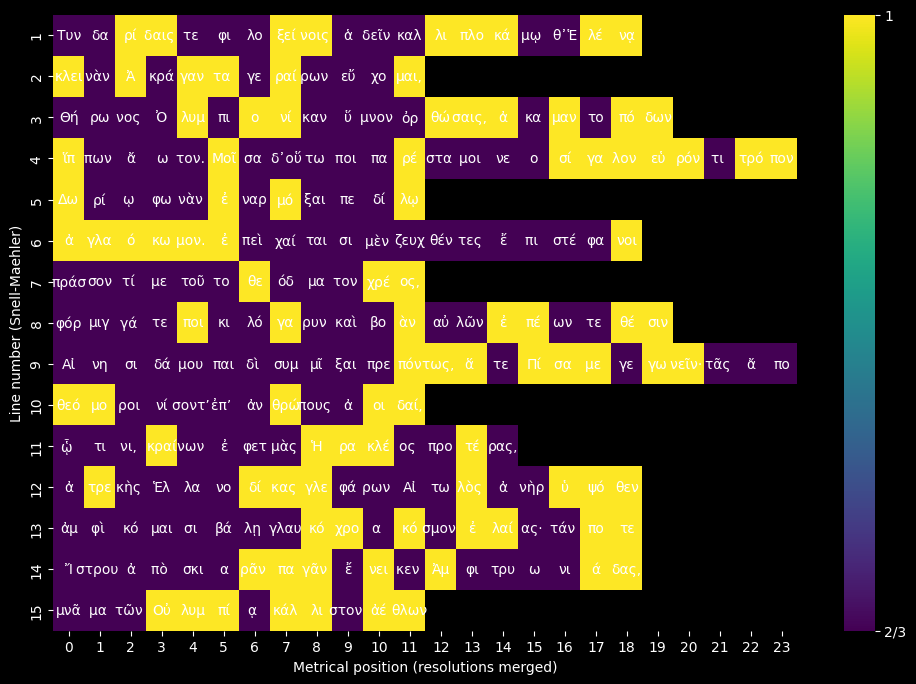

In [15]:
from fractions import Fraction
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.stats_comp import compatibility_canticum
from src.utils.utils import get_text_matrix

xml_file = 'data/compiled/ht_olympians_triads.xml'
canticum_id = "ol03"
canticum_idx = int(canticum_id[-2:])

# -----------------------------
# Prepare text matrix
# -----------------------------

text_matrix, row_lengths = get_text_matrix(xml_file, canticum_index=canticum_idx)
num_rows = len(text_matrix)
row_lengths = [len(row) for row in text_matrix]

print(f"Number of rows: {num_rows}")
print(f"Length of each row: {row_lengths}")

# -----------------------------
# Plot heatmap with text
# -----------------------------

data_matrix = compatibility_canticum(xml_file, canticum_ID=canticum_id)

# -----------------------------
# Shape check
# -----------------------------
num_rows_text = len(text_matrix)
num_rows_data = len(data_matrix)

if num_rows_text != num_rows_data:
    raise ValueError(f"Number of rows mismatch: text_matrix={num_rows_text}, data_matrix={num_rows_data}")

max_len_text = max(len(row) for row in text_matrix)
max_len_data = max(len(row) for row in data_matrix)

if max_len_text != max_len_data:
    raise ValueError(f"Row length mismatch: max text length={max_len_text}, max data length={max_len_data}")

# -----------------------------
# Pad numeric matrix for heatmap
# -----------------------------
max_len = max_len_data
padded_data = np.full((len(data_matrix), max_len), np.nan)
for i, row in enumerate(data_matrix):
    padded_data[i, :len(row)] = row


min_val = np.nanmin(padded_data)
min_frac = Fraction(min_val).limit_denominator()  # exact rational

# denominator b
den = min_frac.denominator
start = min_frac.numerator

# Generate fractions from a/b to b/b
fractions = [Fraction(n, den) for n in range(start, den + 1)]
tick_positions = [float(fr) for fr in fractions]
tick_labels = [str(fr) for fr in fractions]

# -----------------------------
# Plot heatmap
# -----------------------------
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    padded_data,
    cmap="viridis",
    mask=np.isnan(padded_data),
    cbar=True,
    cbar_kws={'ticks': tick_positions}
)

# Dark background + white labels
ax.set_facecolor("black")
ax.figure.set_facecolor("black")
ax.tick_params(colors="white")  # tick labels
ax.xaxis.label.set_color("white")
ax.yaxis.label.set_color("white")
ax.title.set_color("white")

# Set fraction labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticklabels(tick_labels)
colorbar.ax.tick_params(colors='white')

# Overlay text
for i, row in enumerate(text_matrix):
    for j, val in enumerate(row):
        ax.text(
            j + 0.5, i + 0.5,
            val,
            ha='center', va='center',
            color='white', fontsize=10
        )

plt.xlabel("Metrical position (resolutions merged)")
plt.ylabel("Line number (Snell-Maehler)")
#plt.title("Melodic-Comp. Heatmap of Pythia 4")
plt.yticks(
    ticks=np.arange(len(data_matrix)) + 0.5,
    labels=np.arange(1, len(data_matrix) + 1)
)

#plt.savefig("media/plots/heatmap_pythia_4_comp.png", dpi=600, bbox_inches="tight")
plt.show()

### All Olympians 

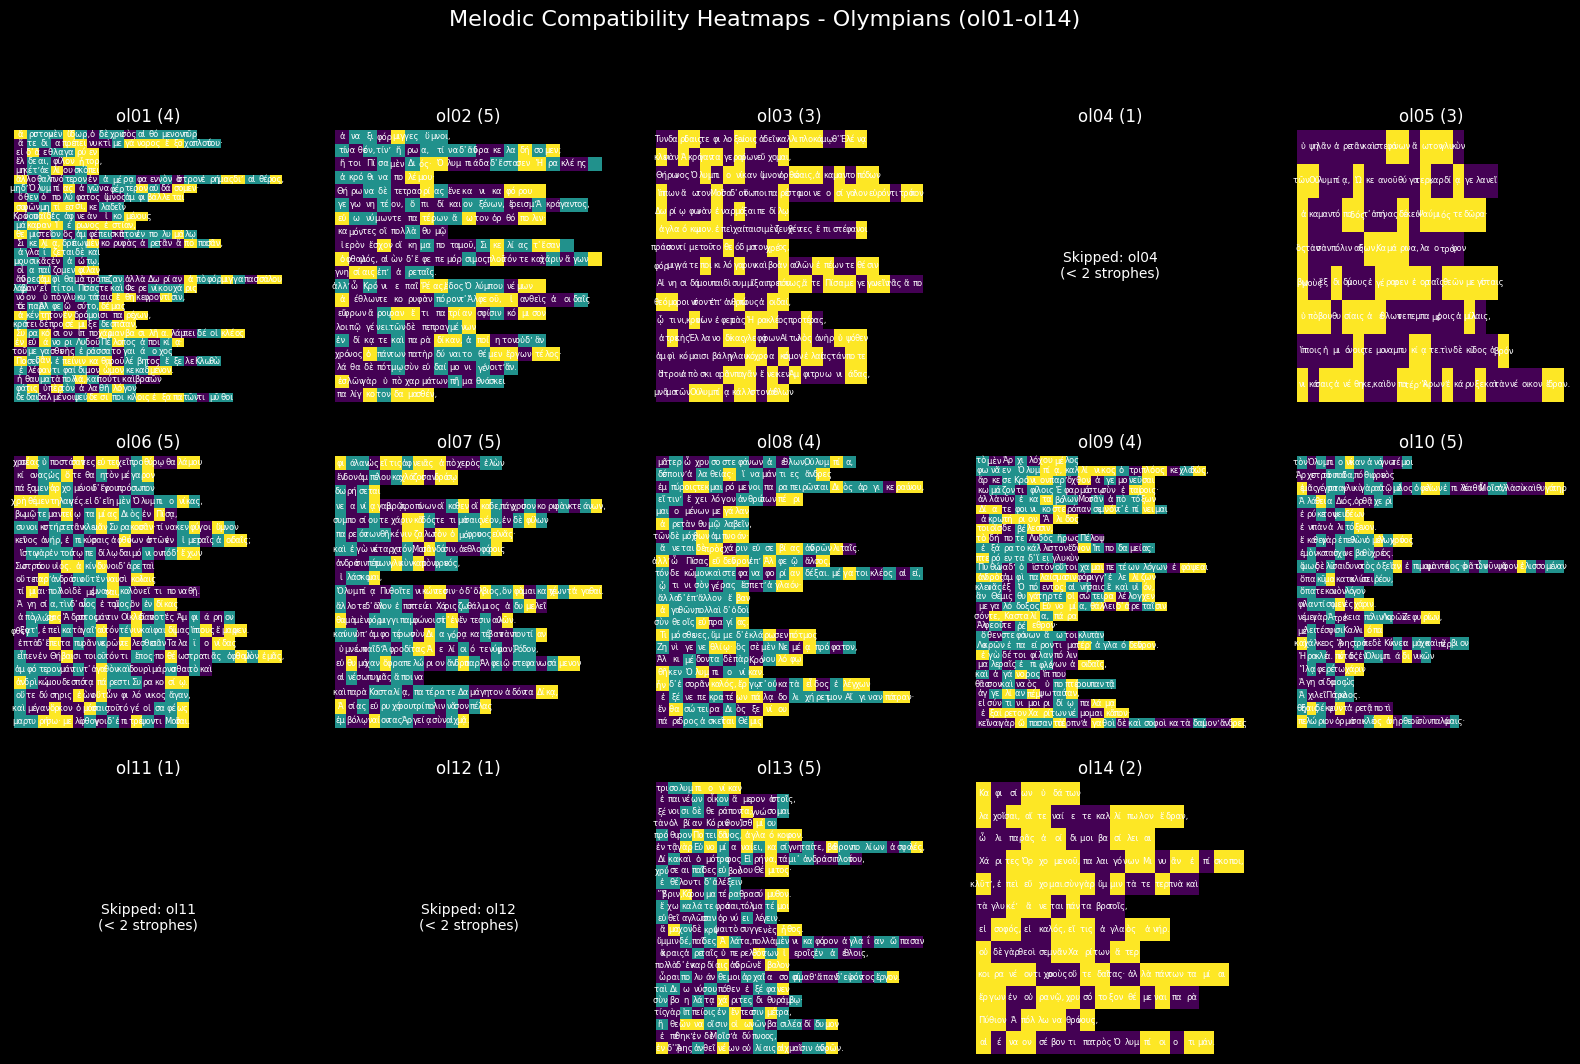

In [1]:
from heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/ht_olympians_triads.xml')